In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import tree
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sns.set_theme(style="ticks",color_codes=True)

In [4]:
dataset_filename = "./data/adult.data.csv"
df_all = pd.read_csv(dataset_filename, delimiter=',', header=None,
                 names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                        'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                        'hours-per-week', 'native-country','income'], skipinitialspace=True)

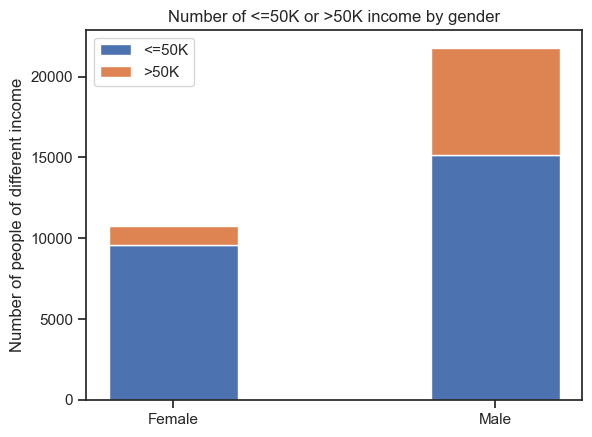

In [5]:
columns_sex_income = ['sex', 'income']

df = df_all.groupby(columns_sex_income).size().reset_index().rename(columns={0:'count'})

dfHigh = df[df['income']=='>50K'].sort_values(by=['sex'])
dfLow = df[df['income']=='<=50K'].sort_values(by=['sex'])

columnNames = np.array(dfHigh['sex'])

fig, ax = plt.subplots()
bottom = np.zeros(2)

p1 = ax.bar(columnNames, np.array(dfLow['count']), 0.4, label='<=50K', bottom=bottom)
bottom += np.array(dfLow['count'])

p2 = ax.bar(columnNames, np.array(dfHigh['count']), 0.4, label='>50K', bottom=bottom)

ax.legend(loc='upper left')
ax.set_ylabel('Number of people of different income')

plt.title('Number of <=50K or >50K income by gender')
plt.show()

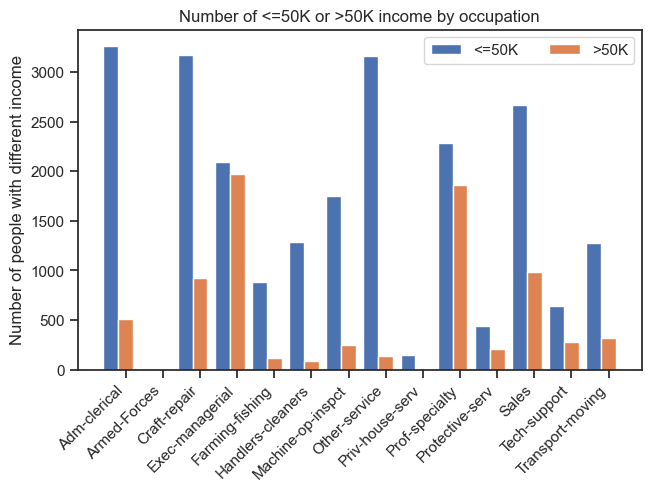

In [6]:
def barChart(column):
    selectedColumns = [column] + ['income']
    
    df = df_all.groupby(selectedColumns).size().reset_index().rename(columns={0: 'count'}).sort_values(by=[column])
    # Filter out ? occupation
    df = df[df[column] != '?']
    
    dfLow = df[df['income'] == '<=50K'][[column, 'count']]
    dfHigh = df[df['income'] == '>50K'][[column, 'count']]

    width = 0.4
    multiplier = 0
    
    fig, ax = plt.subplots(layout='constrained')
    
    columnNames = np.array(dfLow[column])
    labelLoc = np.arange(len(columnNames))
    offset = width * multiplier
    rects = ax.bar(labelLoc + offset, np.array(dfLow['count']), width, label='<=50K')
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    
    columnNames = np.array(dfHigh[column])
    labelLoc = np.arange(len(columnNames))
    offset = width * multiplier
    rects = ax.bar(labelLoc + offset, np.array(dfHigh['count']), width, label='>50K')
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    
    ax.set_xticks(labelLoc + width, np.array(dfHigh[column]))
    ax.legend(loc='upper right', ncols=3)
    ax.set_ylabel('Number of people with different income')
    
    plt.title('Number of <=50K or >50K income by ' + column)
    plt.xticks(rotation=45, ha='right')
    plt.show()

barChart('occupation')

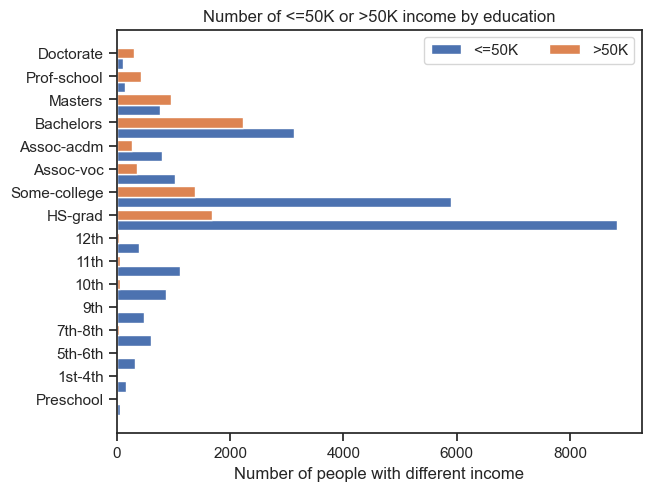

In [7]:
columns_education = ['education', 'education-num', 'income']

df = df_all.groupby(columns_education).size().reset_index().rename(columns={0: 'count'}).sort_values(by=['education-num'])

dfLow = df[df['income'] == '<=50K'][['education', 'count']]
dfHigh = df[df['income'] == '>50K'][['education', 'count']]

edus = np.array(dfLow['education'])

labelLoc = np.arange(len(edus))
width = 0.45
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

offset = width * multiplier
rects = ax.barh(labelLoc + offset, np.array(dfLow['count']), width, label='<=50K')
# ax.bar_label(rects, padding=3)
multiplier += 1

offset = width * multiplier
arr = np.array(dfHigh['count'])
arr = np.insert(arr, 0, 0, axis=0)
rects = ax.barh(labelLoc + offset, arr, width, label='>50K')
# ax.bar_label(rects, padding=3)
multiplier += 1

ax.set_yticks(labelLoc + width, np.array(dfLow['education']))
ax.legend(loc='upper right', ncols=3)
ax.set_xlabel('Number of people with different income')

plt.title('Number of <=50K or >50K income by education')
plt.show()

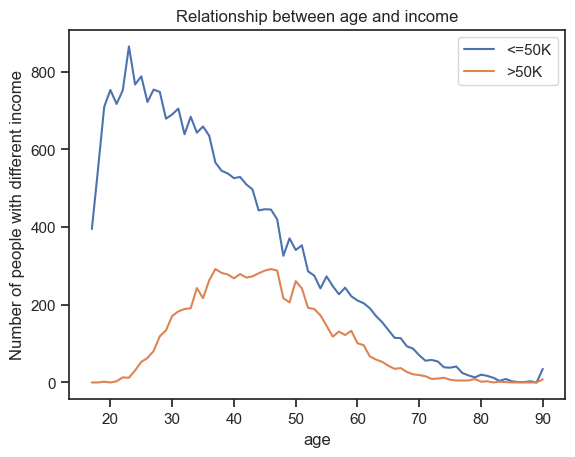

In [8]:
def lineChart(column):
    columnsSelected = [column] + ['income']
    df = df_all.groupby(columnsSelected).size().reset_index().rename(columns={0: 'count'}).sort_values(by=[column])
    
    dfLow = df[df['income'] == '<=50K'][[column, 'count']]
    dfHigh = df[df['income'] == '>50K'][[column, 'count']]
    
    minVal = min(np.concatenate((np.array(dfLow[column]), np.array(dfHigh[column]))))
    maxVal = max(np.concatenate((np.array(dfLow[column]), np.array(dfHigh[column]))))
    
    countsLow = [0]*(maxVal - minVal + 1)
    countsHigh = [0]*(maxVal - minVal + 1)
    
    for _, row in dfLow[[column, 'count']].iterrows():
        countsLow[row[column]-minVal] = row['count']
    
    for _, row in dfHigh[[column, 'count']].iterrows():
        countsHigh[row[column]-minVal] = row['count']
    
    plt.plot(np.arange(minVal, maxVal+1), countsLow, label='<=50K')
    plt.plot(np.arange(minVal, maxVal+1), countsHigh, label='>50K')
    
    plt.title('Relationship between %s and income' % column)
    plt.xlabel(column)
    plt.ylabel('Number of people with different income')
    plt.legend()
    plt.show()

# lineChart('hours-per-week')
lineChart('age')